# FD PARAMETER COMPARISON

In [1]:
import os
os.chdir(os.path.pardir)

In [2]:
from utilities import *

### On corridor_85

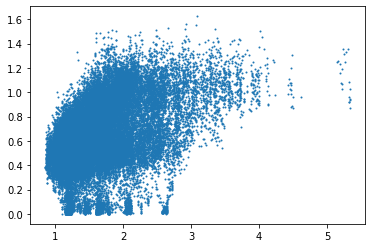

In [3]:
data_path = "../data/dataset_corridor_85"
fd_data, fd_targets = read_dataset(data_path, fd_training=True)
plt.scatter(fd_data, fd_targets, s=1)  # original data
plt.show()

### FIT FD MODEL ON OBSERVATIONS

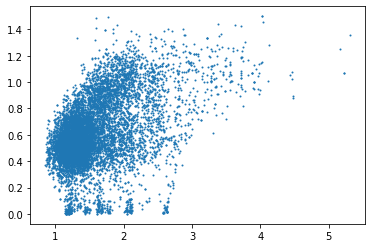

Epoch 1/100
313/313 - 3s - loss: 0.0538 - 3s/epoch - 11ms/step
Epoch 2/100
313/313 - 4s - loss: 0.0503 - 4s/epoch - 13ms/step
Epoch 3/100
313/313 - 7s - loss: 0.0493 - 7s/epoch - 24ms/step
Epoch 4/100
313/313 - 8s - loss: 0.0488 - 8s/epoch - 25ms/step
Epoch 5/100
313/313 - 6s - loss: 0.0485 - 6s/epoch - 19ms/step
Epoch 6/100
313/313 - 8s - loss: 0.0483 - 8s/epoch - 24ms/step
Epoch 7/100
313/313 - 8s - loss: 0.0482 - 8s/epoch - 25ms/step
Epoch 8/100
313/313 - 8s - loss: 0.0481 - 8s/epoch - 26ms/step
Epoch 9/100
313/313 - 9s - loss: 0.0481 - 9s/epoch - 29ms/step
Epoch 10/100
313/313 - 10s - loss: 0.0480 - 10s/epoch - 33ms/step
Epoch 11/100
313/313 - 11s - loss: 0.0480 - 11s/epoch - 34ms/step
Epoch 12/100
313/313 - 11s - loss: 0.0479 - 11s/epoch - 36ms/step
Epoch 13/100
313/313 - 13s - loss: 0.0480 - 13s/epoch - 42ms/step
Epoch 14/100
313/313 - 14s - loss: 0.0479 - 14s/epoch - 45ms/step
Epoch 15/100
313/313 - 15s - loss: 0.0479 - 15s/epoch - 47ms/step
Epoch 16/100
313/313 - 15s - loss: 0.

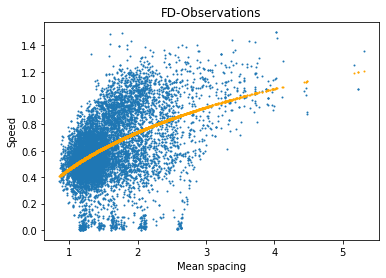

In [4]:
indexes = np.arange(len(fd_data))
indexes = np.random.choice(indexes, size=10000, replace=True)
fd_data = fd_data[indexes]
fd_targets = fd_targets[indexes]

plt.scatter(fd_data, fd_targets, s=1)  # original data
plt.show()

# to stop the computation when model is at its cap
callback = EarlyStopping(monitor='loss', patience=10)  # default on val_loss

# train the FD model
model = FD_Network()
model.compile(optimizer='adam', loss='mse', run_eagerly=True)
model.fit(x=fd_data, y=fd_targets, epochs=100, verbose=2, callbacks=[callback])

# generate the FD speeds with prediction
mean_spacings = fd_data
fd_speeds = model.predict(x=mean_spacings)
model.mse = np.mean((fd_speeds-fd_targets)**2)


# plot the FD prediction over the observations
plt.scatter(fd_data, fd_targets, s=1)  # original data
plt.scatter(mean_spacings, fd_speeds, c='orange', s=1)  # fd model data
plt.xlabel("Mean spacing")
plt.ylabel("Speed")
plt.title("FD-Observations")
plt.show()

### VISUALIZE PARAMETERS FITTING EFFECT BATCH AFTER BATCH (FIT ON OBSERVATIONS)

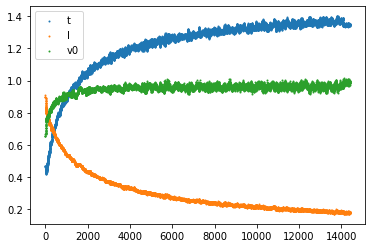

In [5]:
fd1_params = {}
fd1_params['t'] = np.array([model.FD_model_parameters['t'][i] for i in range(len(model.FD_model_parameters['t']))]).flatten()
fd1_params['l'] = np.array([model.FD_model_parameters['l'][i] for i in range(len(model.FD_model_parameters['l']))]).flatten()
fd1_params['v0'] = np.array([model.FD_model_parameters['v0'][i] for i in range(len(model.FD_model_parameters['v0']))]).flatten()

plt.scatter(range(fd1_params['t'].shape[0]), fd1_params['t'], s=1, label='t')
plt.scatter(range(fd1_params['l'].shape[0]), fd1_params['l'], s=1, label='l')
plt.scatter(range(fd1_params['v0'].shape[0]), fd1_params['v0'], s=1, label='v0')
plt.legend()
plt.show()

### CREATE PREDICTIONS  AND FIT AN FD MODEL ON THEM

Training the NN model..
Epoch 1/1000
1655/1655 [==============================] - 2s 813us/step - loss: 0.1247
Epoch 2/1000
1655/1655 [==============================] - 1s 806us/step - loss: 0.0430
Epoch 3/1000
1655/1655 [==============================] - 1s 791us/step - loss: 0.0389
Epoch 4/1000
1655/1655 [==============================] - 1s 775us/step - loss: 0.0355
Epoch 5/1000
1655/1655 [==============================] - 1s 769us/step - loss: 0.0341
Epoch 6/1000
1655/1655 [==============================] - 1s 783us/step - loss: 0.0335
Epoch 7/1000
1655/1655 [==============================] - 1s 845us/step - loss: 0.0333
Epoch 8/1000
1655/1655 [==============================] - 1s 826us/step - loss: 0.0332
Epoch 9/1000
1655/1655 [==============================] - 1s 801us/step - loss: 0.0331
Epoch 10/1000
1655/1655 [==============================] - 1s 813us/step - loss: 0.0331
Epoch 11/1000
1655/1655 [==============================] - 1s 812us/step - loss: 0.0330
Epoch 12/1000
165

1655/1655 [==============================] - 1s 805us/step - loss: 0.0324
Epoch 94/1000
1655/1655 [==============================] - 1s 823us/step - loss: 0.0324
Epoch 95/1000
1655/1655 [==============================] - 1s 812us/step - loss: 0.0324
Epoch 96/1000
1655/1655 [==============================] - 1s 782us/step - loss: 0.0324
Epoch 97/1000
1655/1655 [==============================] - 1s 807us/step - loss: 0.0324
Epoch 98/1000
1655/1655 [==============================] - 1s 809us/step - loss: 0.0324
Epoch 99/1000
1655/1655 [==============================] - 1s 817us/step - loss: 0.0324
Epoch 100/1000
1655/1655 [==============================] - 1s 796us/step - loss: 0.0324
Epoch 101/1000
1655/1655 [==============================] - 1s 787us/step - loss: 0.0324
Epoch 102/1000
1655/1655 [==============================] - 1s 789us/step - loss: 0.0324
Epoch 103/1000
1655/1655 [==============================] - 1s 774us/step - loss: 0.0324
Epoch 104/1000
1655/1655 [================

1655/1655 [==============================] - 1s 799us/step - loss: 0.0321
Epoch 186/1000
1655/1655 [==============================] - 1s 827us/step - loss: 0.0321
Epoch 187/1000
1655/1655 [==============================] - 1s 811us/step - loss: 0.0321
Epoch 188/1000
1655/1655 [==============================] - 1s 805us/step - loss: 0.0321
Epoch 189/1000
1655/1655 [==============================] - 1s 800us/step - loss: 0.0321
Epoch 190/1000
1655/1655 [==============================] - 1s 807us/step - loss: 0.0321
Epoch 191/1000
1655/1655 [==============================] - 1s 778us/step - loss: 0.0321
Epoch 192/1000
1655/1655 [==============================] - 1s 777us/step - loss: 0.0321
Epoch 193/1000
1655/1655 [==============================] - 1s 788us/step - loss: 0.0321
Epoch 194/1000
1655/1655 [==============================] - 1s 780us/step - loss: 0.0321
Epoch 195/1000
1655/1655 [==============================] - 1s 749us/step - loss: 0.0321
Epoch 196/1000
1655/1655 [==========

1655/1655 [==============================] - 1s 787us/step - loss: 0.0316
Epoch 368/1000
1655/1655 [==============================] - 1s 783us/step - loss: 0.0316
Epoch 369/1000
1655/1655 [==============================] - 1s 797us/step - loss: 0.0316
Epoch 370/1000
1655/1655 [==============================] - 1s 770us/step - loss: 0.0316
Epoch 371/1000
1655/1655 [==============================] - 1s 813us/step - loss: 0.0316
Epoch 372/1000
1655/1655 [==============================] - 1s 812us/step - loss: 0.0316
Epoch 373/1000
1655/1655 [==============================] - 1s 844us/step - loss: 0.0316
Epoch 374/1000
1655/1655 [==============================] - 1s 799us/step - loss: 0.0316
Epoch 375/1000
1655/1655 [==============================] - 1s 784us/step - loss: 0.0316
Epoch 376/1000
1655/1655 [==============================] - 1s 759us/step - loss: 0.0316
Epoch 377/1000
1655/1655 [==============================] - 1s 779us/step - loss: 0.0316
Epoch 378/1000
1655/1655 [==========

<ipython-input-6-1e5f906beb86>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


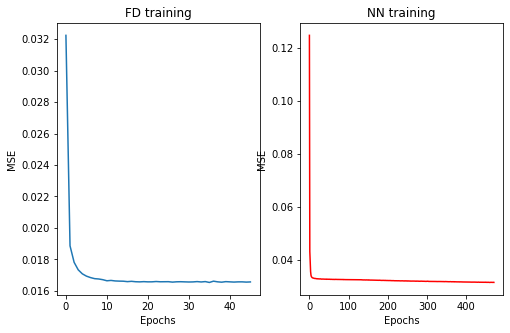

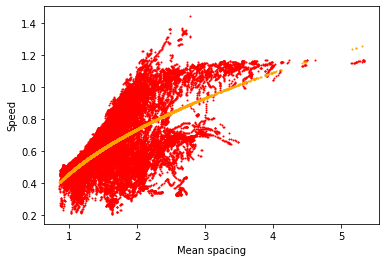

In [6]:
fd_data, fd_targets = read_dataset(data_path, fd_training=True)
nn_data, nn_targets = read_dataset(data_path, fd_training=False)


# to stop the computation when model is at its cap
callback = EarlyStopping(monitor='loss', patience=10)  # default on val_loss

hidden_dims = (3,)

# train the speed predictor neural network
print("Training the NN model..")
nn = create_nn(hidden_dims, dropout=-1)
nn.compile(optimizer='adam', loss='mse')
hist = nn.fit(x=nn_data, y=nn_targets, epochs=1000, callbacks=[callback], verbose=1)
loss_nn = hist.history['loss']

# create the speed for FD to learn
nn_speeds = nn.predict(x=nn_data)

# train the FD model
print("Training the FD model..")
fd_data = fd_data[indexes]
nn_speeds_for_fd_training = nn_speeds[indexes]
model2 = FD_Network()
model2.compile(optimizer='adam', loss='mse', run_eagerly=True)
hist = model2.fit(x=fd_data, y=nn_speeds_for_fd_training, epochs=100, callbacks=[callback], verbose=1)
loss_fd = hist.history['loss']

# training plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
# FD
ax[0].plot(loss_fd)
ax[0].set_title("FD training")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE")
# NN
ax[1].plot(loss_nn, c='red')
ax[1].set_title("NN training")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("MSE")
fig.show()

# plot
mean_spacings = fd_data
fd_speeds = model2.predict(x=mean_spacings)
fig, ax = plt.subplots(1, 1)
ax.scatter(nn_data[:, 0], nn_speeds, s=1, c='red')
ax.scatter(mean_spacings, fd_speeds, c='orange', s=1)
ax.set_xlabel("Mean spacing")
ax.set_ylabel("Speed")
# fig.suptitle("")
plt.show()

### VISUALIZE PARAMETERS FITTING EFFECT BATCH AFTER BATCH (FIT ON PREDICTIONS)

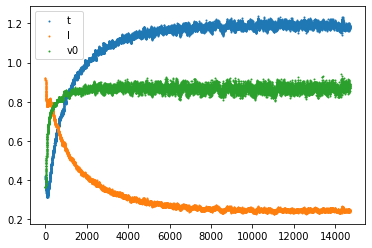

In [7]:
fd2_params = {}
fd2_params['t'] = np.array([model2.FD_model_parameters['t'][i] for i in range(len(model2.FD_model_parameters['t']))]).flatten()
fd2_params['l'] = np.array([model2.FD_model_parameters['l'][i] for i in range(len(model2.FD_model_parameters['l']))]).flatten()
fd2_params['v0'] = np.array([model2.FD_model_parameters['v0'][i] for i in range(len(model2.FD_model_parameters['v0']))]).flatten()

plt.scatter(range(fd2_params['t'].shape[0]), fd2_params['t'], s=1, label='t')
plt.scatter(range(fd2_params['l'].shape[0]), fd2_params['l'], s=1, label='l')
plt.scatter(range(fd2_params['v0'].shape[0]), fd2_params['v0'], s=1, label='v0')
plt.legend()
plt.show()


### COMPARE RESULTS

In [8]:
fd1_t = round(np.mean(fd1_params['t'][1000:]),3)
fd1_l = round(np.mean(fd1_params['l'][1000:]),3)
fd1_v0 = round(np.mean(fd1_params['v0'][1000:]),3)
fd2_t = round(np.mean(fd2_params['t'][1000:]),3)
fd2_l = round(np.mean(fd2_params['l'][1000:]),3)
fd2_v0 = round(np.mean(fd2_params['v0'][1000:]),3)

In [9]:
fd1_t, fd2_t

(1.259, 1.146)

In [10]:
fd1_l, fd2_l

(0.274, 0.287)

In [11]:
fd1_v0, fd2_v0

(0.957, 0.867)

### On bottleneck_070

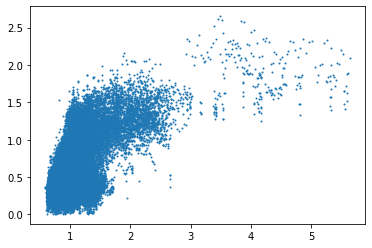

In [3]:
data_path = "../data/dataset_bottleneck_070"
fd_data, fd_targets = read_dataset(data_path, fd_training=True)
plt.scatter(fd_data, fd_targets, s=1)  # original data
plt.show()

### FIT FD MODEL ON OBSERVATIONS

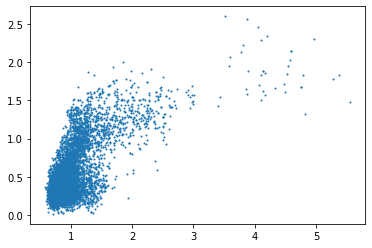

Epoch 1/100
313/313 - 11s - loss: 0.1808 - 11s/epoch - 34ms/step
Epoch 2/100
313/313 - 12s - loss: 0.0519 - 12s/epoch - 38ms/step
Epoch 3/100
313/313 - 16s - loss: 0.0515 - 16s/epoch - 52ms/step
Epoch 4/100
313/313 - 18s - loss: 0.0513 - 18s/epoch - 57ms/step
Epoch 5/100
313/313 - 21s - loss: 0.0511 - 21s/epoch - 67ms/step
Epoch 6/100
313/313 - 24s - loss: 0.0511 - 24s/epoch - 78ms/step
Epoch 7/100
313/313 - 28s - loss: 0.0510 - 28s/epoch - 89ms/step
Epoch 8/100
313/313 - 34s - loss: 0.0510 - 34s/epoch - 107ms/step
Epoch 9/100
313/313 - 30s - loss: 0.0510 - 30s/epoch - 96ms/step
Epoch 10/100
313/313 - 38s - loss: 0.0510 - 38s/epoch - 120ms/step
Epoch 11/100
313/313 - 38s - loss: 0.0509 - 38s/epoch - 121ms/step
Epoch 12/100
313/313 - 39s - loss: 0.0509 - 39s/epoch - 125ms/step
Epoch 13/100
313/313 - 42s - loss: 0.0510 - 42s/epoch - 133ms/step
Epoch 14/100
313/313 - 44s - loss: 0.0509 - 44s/epoch - 142ms/step
Epoch 15/100
313/313 - 48s - loss: 0.0509 - 48s/epoch - 152ms/step
Epoch 16/100

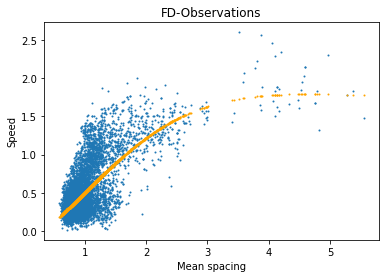

In [4]:
indexes = np.arange(len(fd_data))
indexes = np.random.choice(indexes, size=10000, replace=True)
fd_data = fd_data[indexes]
fd_targets = fd_targets[indexes]

plt.scatter(fd_data, fd_targets, s=1)  # original data
plt.show()

# to stop the computation when model is at its cap
callback = EarlyStopping(monitor='loss', patience=10)  # default on val_loss

# train the FD model
model = FD_Network()
model.compile(optimizer='adam', loss='mse', run_eagerly=True)
model.fit(x=fd_data, y=fd_targets, epochs=100, verbose=2, callbacks=[callback])

# generate the FD speeds with prediction
mean_spacings = fd_data
fd_speeds = model.predict(x=mean_spacings)
model.mse = np.mean((fd_speeds-fd_targets)**2)


# plot the FD prediction over the observations
plt.scatter(fd_data, fd_targets, s=1)  # original data
plt.scatter(mean_spacings, fd_speeds, c='orange', s=1)  # fd model data
plt.xlabel("Mean spacing")
plt.ylabel("Speed")
plt.title("FD-Observations")
plt.show()

### VISUALIZE PARAMETERS FITTING EFFECT BATCH AFTER BATCH (FIT ON OBSERVATIONS)

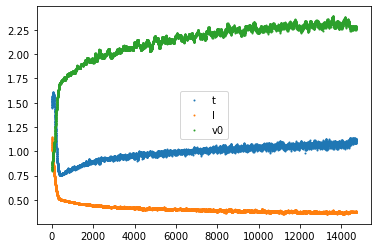

In [5]:
fd1_params = {}
fd1_params['t'] = np.array([model.FD_model_parameters['t'][i] for i in range(len(model.FD_model_parameters['t']))]).flatten()
fd1_params['l'] = np.array([model.FD_model_parameters['l'][i] for i in range(len(model.FD_model_parameters['l']))]).flatten()
fd1_params['v0'] = np.array([model.FD_model_parameters['v0'][i] for i in range(len(model.FD_model_parameters['v0']))]).flatten()

plt.scatter(range(fd1_params['t'].shape[0]), fd1_params['t'], s=1, label='t')
plt.scatter(range(fd1_params['l'].shape[0]), fd1_params['l'], s=1, label='l')
plt.scatter(range(fd1_params['v0'].shape[0]), fd1_params['v0'], s=1, label='v0')
plt.legend()
plt.show()

### CREATE PREDICTIONS  AND FIT AN FD MODEL ON THEM

Training the NN model..
Epoch 1/1000
2323/2323 [==============================] - 2s 772us/step - loss: 0.0832
Epoch 2/1000
2323/2323 [==============================] - 2s 742us/step - loss: 0.0473
Epoch 3/1000
2323/2323 [==============================] - 2s 730us/step - loss: 0.0436
Epoch 4/1000
2323/2323 [==============================] - 2s 735us/step - loss: 0.0409
Epoch 5/1000
2323/2323 [==============================] - 2s 746us/step - loss: 0.0391
Epoch 6/1000
2323/2323 [==============================] - 2s 730us/step - loss: 0.0382
Epoch 7/1000
2323/2323 [==============================] - 2s 727us/step - loss: 0.0376
Epoch 8/1000
2323/2323 [==============================] - 2s 730us/step - loss: 0.0373
Epoch 9/1000
2323/2323 [==============================] - 2s 788us/step - loss: 0.0371
Epoch 10/1000
2323/2323 [==============================] - 2s 735us/step - loss: 0.0368
Epoch 11/1000
2323/2323 [==============================] - 2s 736us/step - loss: 0.0367
Epoch 12/1000
232

Epoch 94/1000
2323/2323 [==============================] - 2s 713us/step - loss: 0.0343
Epoch 95/1000
2323/2323 [==============================] - 2s 729us/step - loss: 0.0343
Epoch 96/1000
2323/2323 [==============================] - 2s 716us/step - loss: 0.0343
Epoch 97/1000
2323/2323 [==============================] - 2s 707us/step - loss: 0.0343
Epoch 98/1000
2323/2323 [==============================] - 2s 703us/step - loss: 0.0343
Epoch 99/1000
2323/2323 [==============================] - 2s 737us/step - loss: 0.0343
Epoch 100/1000
2323/2323 [==============================] - 2s 715us/step - loss: 0.0343
Epoch 101/1000
2323/2323 [==============================] - 2s 729us/step - loss: 0.0343
Epoch 102/1000
2323/2323 [==============================] - 2s 710us/step - loss: 0.0343
Epoch 103/1000
2323/2323 [==============================] - 2s 730us/step - loss: 0.0343
Epoch 104/1000
2323/2323 [==============================] - 2s 713us/step - loss: 0.0343
Epoch 105/1000
2323/2323 [=

313/313 [==============================] - 5s 16ms/step - loss: 0.0140
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.0138
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.0138
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.0137
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.0137
Epoch 8/100
313/313 [==============================] - 10s 32ms/step - loss: 0.0137
Epoch 9/100
313/313 [==============================] - 11s 35ms/step - loss: 0.0137
Epoch 10/100
313/313 [==============================] - 12s 38ms/step - loss: 0.0137
Epoch 11/100
313/313 [==============================] - 13s 41ms/step - loss: 0.0136
Epoch 12/100
313/313 [==============================] - 14s 44ms/step - loss: 0.0136
Epoch 13/100
313/313 [==============================] - 15s 47ms/step - loss: 0.0136
Epoch 14/100
313/313 [==============================] - 16s 52ms/step - loss: 0.0136
Epoc

<ipython-input-6-1e5f906beb86>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


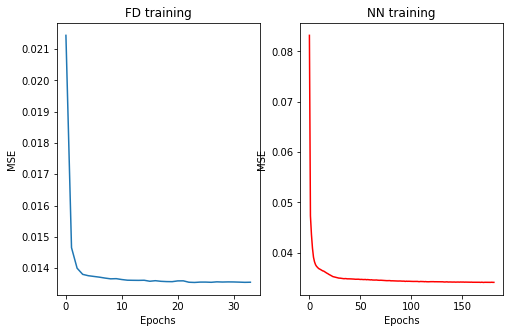

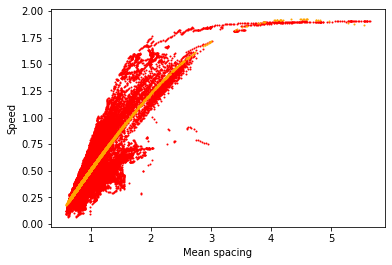

In [6]:
fd_data, fd_targets = read_dataset(data_path, fd_training=True)
nn_data, nn_targets = read_dataset(data_path, fd_training=False)


# to stop the computation when model is at its cap
callback = EarlyStopping(monitor='loss', patience=10)  # default on val_loss

hidden_dims = (3,)

# train the speed predictor neural network
print("Training the NN model..")
nn = create_nn(hidden_dims, dropout=-1)
nn.compile(optimizer='adam', loss='mse')
hist = nn.fit(x=nn_data, y=nn_targets, epochs=1000, callbacks=[callback], verbose=1)
loss_nn = hist.history['loss']

# create the speed for FD to learn
nn_speeds = nn.predict(x=nn_data)

# train the FD model
print("Training the FD model..")
fd_data = fd_data[indexes]
nn_speeds_for_fd_training = nn_speeds[indexes]
model2 = FD_Network()
model2.compile(optimizer='adam', loss='mse', run_eagerly=True)
hist = model2.fit(x=fd_data, y=nn_speeds_for_fd_training, epochs=100, callbacks=[callback], verbose=1)
loss_fd = hist.history['loss']

# training plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
# FD
ax[0].plot(loss_fd)
ax[0].set_title("FD training")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE")
# NN
ax[1].plot(loss_nn, c='red')
ax[1].set_title("NN training")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("MSE")
fig.show()

# plot
mean_spacings = fd_data
fd_speeds = model2.predict(x=mean_spacings)
fig, ax = plt.subplots(1, 1)
ax.scatter(nn_data[:, 0], nn_speeds, s=1, c='red')
ax.scatter(mean_spacings, fd_speeds, c='orange', s=1)
ax.set_xlabel("Mean spacing")
ax.set_ylabel("Speed")
# fig.suptitle("")
plt.show()

### VISUALIZE PARAMETERS FITTING EFFECT BATCH AFTER BATCH (FIT ON PREDICTIONS)

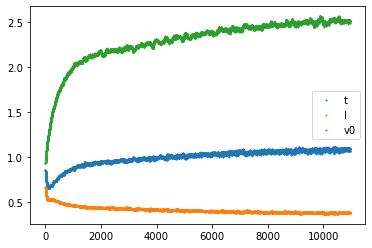

In [7]:
fd2_params = {}
fd2_params['t'] = np.array([model2.FD_model_parameters['t'][i] for i in range(len(model2.FD_model_parameters['t']))]).flatten()
fd2_params['l'] = np.array([model2.FD_model_parameters['l'][i] for i in range(len(model2.FD_model_parameters['l']))]).flatten()
fd2_params['v0'] = np.array([model2.FD_model_parameters['v0'][i] for i in range(len(model2.FD_model_parameters['v0']))]).flatten()

plt.scatter(range(fd2_params['t'].shape[0]), fd2_params['t'], s=1, label='t')
plt.scatter(range(fd2_params['l'].shape[0]), fd2_params['l'], s=1, label='l')
plt.scatter(range(fd2_params['v0'].shape[0]), fd2_params['v0'], s=1, label='v0')
plt.legend()
plt.show()


### COMPARE RESULTS

In [8]:
fd1_t = round(np.mean(fd1_params['t'][1000:]),3)
fd1_l = round(np.mean(fd1_params['l'][1000:]),3)
fd1_v0 = round(np.mean(fd1_params['v0'][1000:]),3)
fd2_t = round(np.mean(fd2_params['t'][1000:]),3)
fd2_l = round(np.mean(fd2_params['l'][1000:]),3)
fd2_v0 = round(np.mean(fd2_params['v0'][1000:]),3)

In [9]:
fd1_t, fd2_t

(1.004, 1.019)

In [10]:
fd1_l, fd2_l

(0.399, 0.404)

In [11]:
fd1_v0, fd2_v0

(2.176, 2.354)